# Independent Work Project
The goal of this project is to use methods in data science to predict the probability that every player in the first round of the 2019 NBA draft makes an All-NBA team throughout their careers.

### Anaconda
We will use the Anaconda platform for Python for this project

In [47]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
from sklearn.metrics import confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
# Random Forest

oversample = True
normalize = False

### Loading and preparing the data for analysis
The data consists of the college basketball statistics of all first round picks who have played in the NCAA, since the 1990 NBA Draft. The columns consist of:
* Points per game
* Rebounds per game
* Assists per game
* Steals per game
* etc.

In [48]:
# Loading data as Pandas dataframe
df = pd.read_csv('data.csv', header=0)
df = df._get_numeric_data()
headers = list(df.columns)

dataset = df.to_numpy()

y_i = headers.index('All-NBA')
    
# Separate data into features and target
x = dataset[:, 0:y_i]
y = dataset[:, y_i]

In [49]:
if normalize:
    scaler = preprocessing.MinMaxScaler()
    scaler.fit(x)
    scaler.transform(x)

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

if oversample:
    sm = SMOTE(random_state = 2)
    x_train, y_train = sm.fit_sample(x_train, y_train.ravel())

print('Shape of training dataset:', x_train.shape)
print('Shape of testing dataset:', x_test.shape)

Shape of training dataset: (576, 12)
Shape of testing dataset: (112, 12)


### Feature Selection

# The Predictive Models
We will use the following models for the following reasons...

## 1. Logistic Regression Model
Our first model will be a logistic regression model, using the default sklearn parameters.


In [50]:
clf = LogisticRegression(max_iter=500)

grid_values = {
    'solver': ['liblinear'],
    'penalty': ['l1','l2'],
    'C':[int(x) for x in np.linspace(start = 1, stop = 50, num = 20)]
}

model_log = GridSearchCV(clf, param_grid = grid_values, cv=3, scoring = 'f1')

# Evaluating the Models
We will now look at a few methods of evaluating the models we've created

In [51]:
# Evaluation method
def evaluate(model, model_name):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    # Accuracy, recall, precision and F1
    print('Accuracy of "%s" model: %.3f' % (model_name, metrics.accuracy_score(y_test, pred)))
    print('Recall of "%s" model: %.3f' % (model_name, metrics.recall_score(y_test, pred)))
    print('Precision of "%s" model: %.3f' % (model_name, metrics.precision_score(y_test, pred)))
    print('F1 of "%s" model: %.3f' % (model_name, metrics.f1_score(y_test, pred)))

    # Confusion matrix
    xlabels=['Predicted 0', 'Predicted 1']
    ylabels=['Actual 0', 'Actual 1']
    
    cm = confusion_matrix(y_test, pred)
    df_cm = pd.DataFrame(cm, range(2), range(2))
    ax = sn.heatmap(df_cm, square=True, annot=True, xticklabels=xlabels, yticklabels=ylabels)
    ax.set_ylim(2, 0) # workaround for cut-off bug
    plt.show()
    
    # ROC Curve
    probs = model.predict_proba(x_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Dummy Classifier
A dummy classifier assigns labels randomly, according to the distribution of classes in the training set

In [52]:
dummy = DummyClassifier(strategy='stratified')

Accuracy of "Dummy" model: 0.500
Recall of "Dummy" model: 0.533
Precision of "Dummy" model: 0.140
F1 of "Dummy" model: 0.222


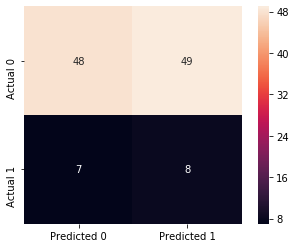

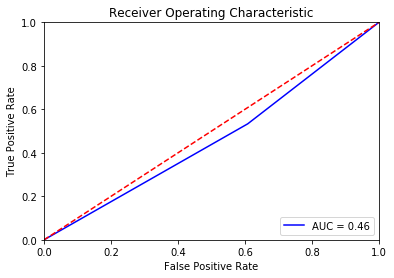

In [58]:
evaluate(dummy, 'Dummy')

Accuracy of "logistic" model: 0.750
Recall of "logistic" model: 0.733
Precision of "logistic" model: 0.314
F1 of "logistic" model: 0.440


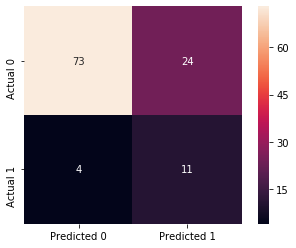

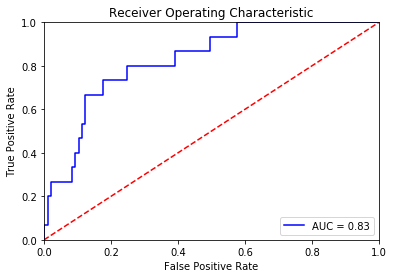

In [54]:
evaluate(model_log, 'logistic')